### [ 시도별 전출입 인구수 분석 - Matplotlib ]
- 데이터셋 : 1970년도 ~ 2017년도까지 인구이동수
- 대구의 타지역 이동 인구수 분석
- 전국의 인구 이동수에 대한 분석

- 과정
    - 데이터파일 확인 -> 첫번째 줄이 컬럼명 맞는지 확인
    - 불필요한 컬럼이나 행이 있는지 확인
    - 결측치 정도 확인

-전처리
    -파일 확인후 체크한 사항 진행 (어떤컬럼지울건지 불필요한 컬럼 어떻게 할건지)
    -결측치 처리
    -이상치 처리
    -중복데이터 처리
    -함수로정리하고 변수에 저장.

-데이터 가공 : 분석하고자하는 데이터 형태로 만들어주기
    -행인덱스 처리 : 멀티인덱스/컬럼-> 행인덱스/행인덱스초기화
    -필요한 컬럼 & 행 추출
    -추가적인 결측치/이상치 중복 데이터 확인 후 처리
    -형변환 -> 연속형 -> 범주형(택1)
    -형변환 -> 범주형 -> 연속형(택2)

-데이터 분석
    -탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾기
    -시각화 및 분석 결과 텍스트 요약 정리


[1] 준비과정 : 모듈, 데이터

In [39]:
# 1-1. 모듈을 로딩
import pandas as pd     # 데이터 분석용 모듈
import matplotlib.pyplot as plt # 데이터 시각화용 모듈


In [40]:
# 1-2 데이터 준비
F_DATA=r'C:\Users\zizonkjs\pandas\datafolder\시도별 전출입 인구수.xlsx'

In [41]:
# 1-3. DATA -> DataFrame 형태 저장
datadf=pd.read_excel(F_DATA, engine='openpyxl') # engine사용

- [2] 데이터 확인 : 행과 컬럼수, 실제데이터와 컬럼 타입, 결측치 체크

In [42]:
# 2-1 기본 정보 확인 => info(), describe()
datadf.info()
# 컬럼의 수
# 행의 갯수
# 각각의 컬럼별로 결측치아닌것(non-null) 데이터 수, 데이터 타입
# 데이터타입
# 메모리사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [43]:
# 2-2 기본 정보 확인
# 수치 데이터 컬럼의 데이터 분포 확인 : 최대값, 최소값, 표준편차, 사분위수, 평균값 모든열 상관계수corr() <- int나 float만 있을 때 사용가능.
# 범주 데이터 컬럼의 데이터 분포 확인 : 고유값, 많이 나온값, 가장많이 나온 값의 빈도수
print(datadf.describe()) # include=all 수치데이터 아닌것까지 나옴
# 범주형 데이터
# unique 고윳값
# top 많이나온값
# freq 많이 나온 값의 빈도수

       전출지별 전입지별 1970 1971 1972 1973 1974 1975 1976 1977  ... 2008 2009 2010  \
count    18  324  325  325  325  325  325  325  325  325  ...  325  325  325   
unique   18   18  146  146  146  146  145  146  146  146  ...  289  289  289   
top      전국   전국    -    -    -    -    -    -    -    -  ...    -    -    -   
freq      1   18  180  180  180  180  180  180  180  180  ...   35   35   35   

       2011  2012  2013  2014  2015  2016 2017  
count   325   325   325   325   325   325  325  
unique  291   323   320   321   324   322  323  
top       -  1489  1939  2026  1468  4303  947  
freq     35     2     2     2     2     2    2  

[4 rows x 50 columns]


In [44]:
# 2-3 실제데이터 info()에서 확인 한 타입 비교 -> head()/tail()
datadf.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [45]:
## 기본 정보 확인 후 결과
# - 불필요한 행/컬럼 : 0번행 삭제
# - 결측치 : '전출지별' 컬럼 ==> 이전 행 값으로 채우기
# - 이상치 : 행별로 '-' 값이 수치값과 섞여있음 ==> 0으로 처리 필요!

- [3] 데이터 전처리 : 기본확인 파악된 내용들 처리
    -기본확인 파악된 내용들 처리
    -불필요 데이터 삭제 : 0번행 삭제
    -결측치 데이터 처리 : '전출지별'컬럼 처리
    -이상치 데이터 처리 : '-'에대한 처리
    -데이터 자료형 일치 : 형변환
    

In [46]:
# 3-1 불필요 데이터 처리
copydf=datadf.drop(index=0)
copydf.head() # 데이터 확인하기


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [47]:
# 3-2. 결측치 데이터 처리 -> isna()/isnull() -> 확인
copydf.isna().sum() # 전체 nan 계수 확인



전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [48]:
# nan발견시 그 결측치 데이터만 추출
# print(copydf.columns) # 컬럼을 리스트로 확인
a=copydf[['1984','1985','1986']].isna()
a.sum(axis=1)>0 # 모든컬럼을 한개 행 0 보다 큰애 하면 불린인덱스 추출가능 Series
# a[a.sum(axis=1)>0] # a 의 컬럼값확인


1      False
2      False
3      False
4      False
5      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 324, dtype: bool

In [49]:
# 전출 지별

copydf['전출지별']=copydf['전출지별'].ffill() # sereis 일부 프레임만 뽑아내서 이 값으로 저장

# 수치데이터 결측치 처리

copydf=copydf.fillna(0)
copydf.isna().sum()


C:\Users\KDP-26\AppData\Local\Temp\ipykernel_20200\523060166.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copydf=copydf.fillna(0)


전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [50]:

#copydf[['1984','1985','1986']]=copydf[['1984','1985','1986']].fillna(0, inplace=True) 

In [51]:
# 3-3 이상치 처리하는 방법
copydf=copydf.replace('-', 0)
copydf


C:\Users\KDP-26\AppData\Local\Temp\ipykernel_20200\1237116153.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copydf=copydf.replace('-', 0)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [52]:
# 3-4 자료형 변환
d_=dict(zip(copydf.columns[2:].to_list(), [int]*(copydf.shape[1]-2))) # 컬럼별로 다른타입으로 형변환할 때 사용
copydf=copydf.astype(d_)

In [53]:
# 4. 대구과역시 데이터만 추출
mask = (copydf['전출지별']=='대구광역시')
citydf=copydf[mask]
citydf

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [54]:
# 전출지별 컬럼 삭제
citydf=citydf.drop('전출지별', axis=1)

# 전입지별 컬럼 행 인덱스 설정
citydf.set_index('전입지별', inplace=True)

In [55]:
# 대구광역시, 전국 행 삭제
citydf.drop(['대구광역시','전국'], inplace=True)

In [56]:
# 가공데이터 확인
print(citydf.dtypes, citydf.columns, citydf.index, sep='\n\n')

1970    int32
1971    int32
1972    int32
1973    int32
1974    int32
1975    int32
1976    int32
1977    int32
1978    int32
1979    int32
1980    int32
1981    int32
1982    int32
1983    int32
1984    int32
1985    int32
1986    int32
1987    int32
1988    int32
1989    int32
1990    int32
1991    int32
1992    int32
1993    int32
1994    int32
1995    int32
1996    int32
1997    int32
1998    int32
1999    int32
2000    int32
2001    int32
2002    int32
2003    int32
2004    int32
2005    int32
2006    int32
2007    int32
2008    int32
2009    int32
2010    int32
2011    int32
2012    int32
2013    int32
2014    int32
2015    int32
2016    int32
2017    int32
dtype: object

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005

# 5. 히스토그램으로 특정 컬럼 데이터 분포 시각화하기



In [57]:
# 2000년도 데이터의 분포보기
citydf.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [58]:
# 값 기준 정렬 -> 기본=오름차순
citydf['2000'].sort_values(ascending=False) # 값을 기준으로 정렬

전입지별
경상북도       52556
서울특별시      16970
경기도        13071
경상남도        7977
부산광역시       5844
울산광역시       3465
대전광역시       2378
인천광역시       2209
충청남도        2087
강원도         1889
충청북도        1824
전라북도        1016
전라남도         971
제주특별자치도      701
광주광역시        531
세종특별자치시        0
Name: 2000, dtype: int32

In [59]:
# 2000년도 대구지역에서 타지역으로 이동 인구수 분포도
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

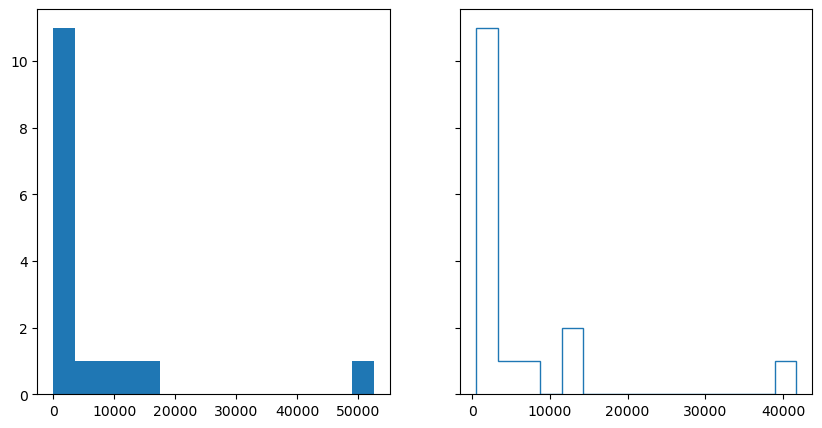

In [60]:
fig=plt.figure(figsize=(10,5))
ax1, ax2=fig.subplots(1,2,sharey=True)
ax1.hist(citydf['2000'],bins=15, histtype='stepfilled')
ax2.hist(citydf['2017'], bins=15, histtype='step')
plt.show()